# In Hospital Mortality Prediction

**Dataset:** In Hospital Mortality Prediction Dataset from MIMIC-III database

**Source:** https://www.kaggle.com/datasets/saurabhshahane/in-hospital-mortality-prediction

**Motivation/Goal:**

The goal of the project is to create a classification model to classify whether a patient will experience in-hospital mortality or not, based on the data obtained from patients admitted to the Intensive Care Unit for Heart Failure. The models focused on are Logistic Regression, Random Forest, and K-Nearest Neighbors. EDA, Feature Selection, and Dimensionality Reduction will be used to manipulate the dataset before modeling. 

Additionally, categorical variables will be used to stratify the data into groups so that we can perform hypothesis testing and test classification model performance over these different groups. The categorical variables to be analyzed will be determined using Random Forest. 

**Dataset Variables:**

group, ID, outcome, age, gendera, BMI, hypertensive, atrialfibrillation, CHD with no MI, diabetes, deficiencyanemias, depression, Hyperlipemia, Renal failure, COPD, heart rate, Systolic blood pressure, Diastolic blood pressure, Respiratory rate, temperature, SP O2, Urine output, hematocrit, RBC, MCH, MCHC, MCV, RDW, Leucocyte, Platelets, Neutrophils, Basophils, Lymphocyte, PT, INR, NT-proBNP, Creatine kinase, Creatinine, Urea nitrogen, glucose, Blood potassium, Blood sodium, Blood calcium, Chloride, Anion gap, Magnesium ion, PH, Bicarbonate, Lactic acid, PCO2, EF



### Data Loading, Preprocessing

In [216]:
#libraries 
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import numpy as np
import eli5
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import  StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
from sklearn.feature_selection import  SelectKBest,f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model

In [217]:
df = pd.read_csv("data01.csv")
df.head()

,group,ID,outcome,age,gendera,BMI,hypertensive,atrialfibrillation,CHD with no MI,diabetes,...,Blood sodium,Blood calcium,Chloride,Anion gap,Magnesium ion,PH,Bicarbonate,Lactic acid,PCO2,EF
0,1,125047,0.0,72,1,37.588179,0,0,0,1,...,138.750000,7.463636,109.166667,13.166667,2.618182,7.230,21.166667,0.5,40.0,55
1,1,139812,0.0,75,2,NaN,0,0,0,0,...,138.888889,8.162500,98.444444,11.444444,1.887500,7.225,33.444444,0.5,78.0,55
2,1,109787,0.0,83,2,26.572634,0,0,0,0,...,140.714286,8.266667,105.857143,10.000000,2.157143,7.268,30.571429,0.5,71.5,35
3,1,130587,0.0,43,2,83.264629,0,0,0,0,...,138.500000,9.476923,92.071429,12.357143,1.942857,7.370,38.571429,0.6,75.0,55
4,1,138290,0.0,75,2,31.824842,1,0,0,0,...,136.666667,8.733333,104.500000,15.166667,1.650000,7.250,22.000000,0.6,50.0,55


In [218]:
df.shape

(1177, 51)

In [219]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1177 entries, 0 to 1176
Data columns (total 51 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   group                     1177 non-null   int64  
 1   ID                        1177 non-null   int64  
 2   outcome                   1176 non-null   float64
 3   age                       1177 non-null   int64  
 4   gendera                   1177 non-null   int64  
 5   BMI                       962 non-null    float64
 6   hypertensive              1177 non-null   int64  
 7   atrialfibrillation        1177 non-null   int64  
 8   CHD with no MI            1177 non-null   int64  
 9   diabetes                  1177 non-null   int64  
 10  deficiencyanemias         1177 non-null   int64  
 11  depression                1177 non-null   int64  
 12  Hyperlipemia              1177 non-null   int64  
 13  Renal failure             1177 non-null   int64  
 14  COPD    

In [220]:
#convert columns to category
columns_to_category= ['outcome', 'gendera','hypertensive','atrialfibrillation','CHD with no MI','diabetes','deficiencyanemias','depression','Hyperlipemia','Renal failure','COPD']
df[columns_to_category]= df[columns_to_category].astype('category')

In [221]:
#### Renaming columns name
columns = df.columns
new_cols =[]
c1= {}
for col in columns:
    res=col.replace(" ","_")
    c1[col] =res
df.rename(columns=c1, inplace=True)    

In [222]:
df.columns

Index(['group', 'ID', 'outcome', 'age', 'gendera', 'BMI', 'hypertensive',
       'atrialfibrillation', 'CHD_with_no_MI', 'diabetes', 'deficiencyanemias',
       'depression', 'Hyperlipemia', 'Renal_failure', 'COPD', 'heart_rate',
       'Systolic_blood_pressure', 'Diastolic_blood_pressure',
       'Respiratory_rate', 'temperature', 'SP_O2', 'Urine_output',
       'hematocrit', 'RBC', 'MCH', 'MCHC', 'MCV', 'RDW', 'Leucocyte',
       'Platelets', 'Neutrophils', 'Basophils', 'Lymphocyte', 'PT', 'INR',
       'NT-proBNP', 'Creatine_kinase', 'Creatinine', 'Urea_nitrogen',
       'glucose', 'Blood_potassium', 'Blood_sodium', 'Blood_calcium',
       'Chloride', 'Anion_gap', 'Magnesium_ion', 'PH', 'Bicarbonate',
       'Lactic_acid', 'PCO2', 'EF'],
      dtype='object')

In [223]:
df.isnull().sum()

group                         0
ID                            0
outcome                       1
age                           0
gendera                       0
BMI                         215
hypertensive                  0
atrialfibrillation            0
CHD_with_no_MI                0
diabetes                      0
deficiencyanemias             0
depression                    0
Hyperlipemia                  0
Renal_failure                 0
COPD                          0
heart_rate                   13
Systolic_blood_pressure      16
Diastolic_blood_pressure     16
Respiratory_rate             13
temperature                  19
SP_O2                        13
Urine_output                 36
hematocrit                    0
RBC                           0
MCH                           0
MCHC                          0
MCV                           0
RDW                           0
Leucocyte                     0
Platelets                     0
Neutrophils                 144
Basophil

### Data Cleaning

In [224]:
# We don't need the group and ID in our model
df.drop(['group','ID'],axis=1,inplace=True)

In [225]:
# droping duplicate value
df.drop_duplicates()

,outcome,age,gendera,BMI,hypertensive,atrialfibrillation,CHD_with_no_MI,diabetes,deficiencyanemias,depression,...,Blood_sodium,Blood_calcium,Chloride,Anion_gap,Magnesium_ion,PH,Bicarbonate,Lactic_acid,PCO2,EF
0,0.0,72,1,37.588179,0,0,0,1,1,0,...,138.750000,7.463636,109.166667,13.166667,2.618182,7.230,21.166667,0.5,40.0,55
1,0.0,75,2,NaN,0,0,0,0,1,0,...,138.888889,8.162500,98.444444,11.444444,1.887500,7.225,33.444444,0.5,78.0,55
2,0.0,83,2,26.572634,0,0,0,0,1,0,...,140.714286,8.266667,105.857143,10.000000,2.157143,7.268,30.571429,0.5,71.5,35
3,0.0,43,2,83.264629,0,0,0,0,0,0,...,138.500000,9.476923,92.071429,12.357143,1.942857,7.370,38.571429,0.6,75.0,55
4,0.0,75,2,31.824842,1,0,0,0,1,0,...,136.666667,8.733333,104.500000,15.166667,1.650000,7.250,22.000000,0.6,50.0,55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1172,0.0,62,1,25.516870,1,1,0,1,0,1,...,136.714286,10.271429,94.428571,20.142857,2.714286,NaN,27.714286,NaN,NaN,40
1173,0.0,78,1,25.822710,0,1,0,1,0,1,...,135.680000,10.523529,101.720000,18.160000,2.012500,NaN,20.480000,NaN,NaN,30
1174,0.0,85,2,23.891779,1,1,0,1,1,0,...,136.000000,8.466667,97.285714,14.000000,2.028571,NaN,28.857143,NaN,NaN,55
1175,0.0,79,2,35.288554,0,0,1,1,1,1,...,140.000000,8.183333,104.000000,15.750000,2.090000,NaN,24.375000,NaN,NaN,25


In [226]:
# droping columns with 1 unique value
for col in df.columns:
    if len(df[col].unique()) == 1:
        df.drop(col,inplace=True,axis=1)

We have 1 null value in our categorical data. we have to remove it.

In [227]:
# cheking for unique value in outcome
df.outcome.unique()

C:\Users\15513\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\lib\pretty.py:778: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  output = repr(obj)


[0.0, 1.0, NaN]
Categories (2, float64): [0.0, 1.0]

In [228]:
# droping the null value from outcome variable
df = df.dropna(subset=['outcome'])

In [229]:
df.describe()

,age,BMI,heart_rate,Systolic_blood_pressure,Diastolic_blood_pressure,Respiratory_rate,temperature,SP_O2,Urine_output,hematocrit,...,Blood_sodium,Blood_calcium,Chloride,Anion_gap,Magnesium_ion,PH,Bicarbonate,Lactic_acid,PCO2,EF
count,1176.000000,962.000000,1164.000000,1161.000000,1161.000000,1164.000000,1158.000000,1164.000000,1141.000000,1176.000000,...,1176.000000,1175.000000,1176.000000,1176.000000,1176.000000,885.000000,1176.000000,948.000000,883.000000,1176.000000
mean,74.047619,30.188278,84.575848,117.995035,59.534497,20.801511,36.677286,96.272900,1899.276512,31.910614,...,138.897009,8.501789,102.292048,13.923755,2.120286,7.378532,26.912116,1.853426,45.535382,48.710034
std,13.437241,9.325997,16.018701,17.367618,10.684681,4.002987,0.607558,2.298002,1272.363631,5.203007,...,4.146172,0.571683,5.334562,2.653463,0.251608,0.067320,5.169696,0.983819,12.711271,12.872604
min,19.000000,13.346801,36.000000,75.000000,24.736842,11.137931,33.250000,75.916667,0.000000,20.311111,...,114.666667,6.700000,80.266667,6.636364,1.400000,7.090000,12.857143,0.500000,18.750000,15.000000
25%,65.000000,24.326461,72.371250,105.391304,52.173913,17.925694,36.286045,95.000000,980.000000,28.154375,...,136.666667,8.150000,99.000000,12.250000,1.955556,7.334615,23.452020,1.200000,37.038462,40.000000
50%,77.000000,28.312474,83.610799,116.128205,58.461538,20.372308,36.650794,96.452273,1675.000000,30.795455,...,139.250000,8.500000,102.516667,13.666667,2.092582,7.380000,26.500000,1.600000,43.000000,55.000000
75%,85.000000,33.633509,95.907143,128.625000,65.464286,23.391200,37.021991,97.917500,2500.000000,35.003125,...,141.600000,8.869375,105.571429,15.404167,2.241964,7.430000,29.881250,2.200000,50.585784,55.000000
max,99.000000,104.970366,135.708333,203.000000,107.000000,40.900000,39.132478,100.000000,8820.000000,55.425000,...,154.736842,10.950000,122.526316,25.500000,4.072727,7.580000,47.666667,8.333333,98.600000,75.000000


In [230]:
# filling null with median
df = df.fillna(df.median())

C:\Users\15513\AppData\Local\Temp\ipykernel_20264\1512416076.py:2: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df = df.fillna(df.median())


In [231]:
# cheling for null value again
df.isnull().sum()

outcome                     0
age                         0
gendera                     0
BMI                         0
hypertensive                0
atrialfibrillation          0
CHD_with_no_MI              0
diabetes                    0
deficiencyanemias           0
depression                  0
Hyperlipemia                0
Renal_failure               0
COPD                        0
heart_rate                  0
Systolic_blood_pressure     0
Diastolic_blood_pressure    0
Respiratory_rate            0
temperature                 0
SP_O2                       0
Urine_output                0
hematocrit                  0
RBC                         0
MCH                         0
MCHC                        0
MCV                         0
RDW                         0
Leucocyte                   0
Platelets                   0
Neutrophils                 0
Basophils                   0
Lymphocyte                  0
PT                          0
INR                         0
NT-proBNP 

Now we can see here is no null value.

In [232]:
df.describe()

,age,BMI,heart_rate,Systolic_blood_pressure,Diastolic_blood_pressure,Respiratory_rate,temperature,SP_O2,Urine_output,hematocrit,...,Blood_sodium,Blood_calcium,Chloride,Anion_gap,Magnesium_ion,PH,Bicarbonate,Lactic_acid,PCO2,EF
count,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,...,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000
mean,74.047619,29.846932,84.566001,117.971224,59.520811,20.797132,36.676880,96.274731,1892.601616,31.910614,...,138.897009,8.501787,102.292048,13.923755,2.120286,7.378895,26.912116,1.804292,44.903693,48.710034
std,13.437241,8.465107,15.936989,17.257678,10.616945,3.982728,0.602896,2.286308,1253.850105,5.203007,...,4.146172,0.571440,5.334562,2.653463,0.251608,0.058396,5.169696,0.888894,11.067475,12.872604
min,19.000000,13.346801,36.000000,75.000000,24.736842,11.137931,33.250000,75.916667,0.000000,20.311111,...,114.666667,6.700000,80.266667,6.636364,1.400000,7.090000,12.857143,0.500000,18.750000,15.000000
25%,65.000000,25.274510,72.535035,105.490385,52.286102,17.954237,36.287037,95.000000,997.250000,28.154375,...,136.666667,8.150000,99.000000,12.250000,1.955556,7.350000,23.452020,1.300000,39.000000,40.000000
50%,77.000000,28.312474,83.610799,116.128205,58.461538,20.372308,36.650794,96.452273,1675.000000,30.795455,...,139.250000,8.500000,102.516667,13.666667,2.092582,7.380000,26.500000,1.600000,43.000000,55.000000
75%,85.000000,32.104250,95.613929,128.489286,65.409759,23.366983,37.016534,97.894608,2475.000000,35.003125,...,141.600000,8.869063,105.571429,15.404167,2.241964,7.410000,29.881250,2.002273,47.275974,55.000000
max,99.000000,104.970366,135.708333,203.000000,107.000000,40.900000,39.132478,100.000000,8820.000000,55.425000,...,154.736842,10.950000,122.526316,25.500000,4.072727,7.580000,47.666667,8.333333,98.600000,75.000000


In [233]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1176 entries, 0 to 1176
Data columns (total 49 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   outcome                   1176 non-null   category
 1   age                       1176 non-null   int64   
 2   gendera                   1176 non-null   category
 3   BMI                       1176 non-null   float64 
 4   hypertensive              1176 non-null   category
 5   atrialfibrillation        1176 non-null   category
 6   CHD_with_no_MI            1176 non-null   category
 7   diabetes                  1176 non-null   category
 8   deficiencyanemias         1176 non-null   category
 9   depression                1176 non-null   category
 10  Hyperlipemia              1176 non-null   category
 11  Renal_failure             1176 non-null   category
 12  COPD                      1176 non-null   category
 13  heart_rate                1176 non-null   float6

### EDA 

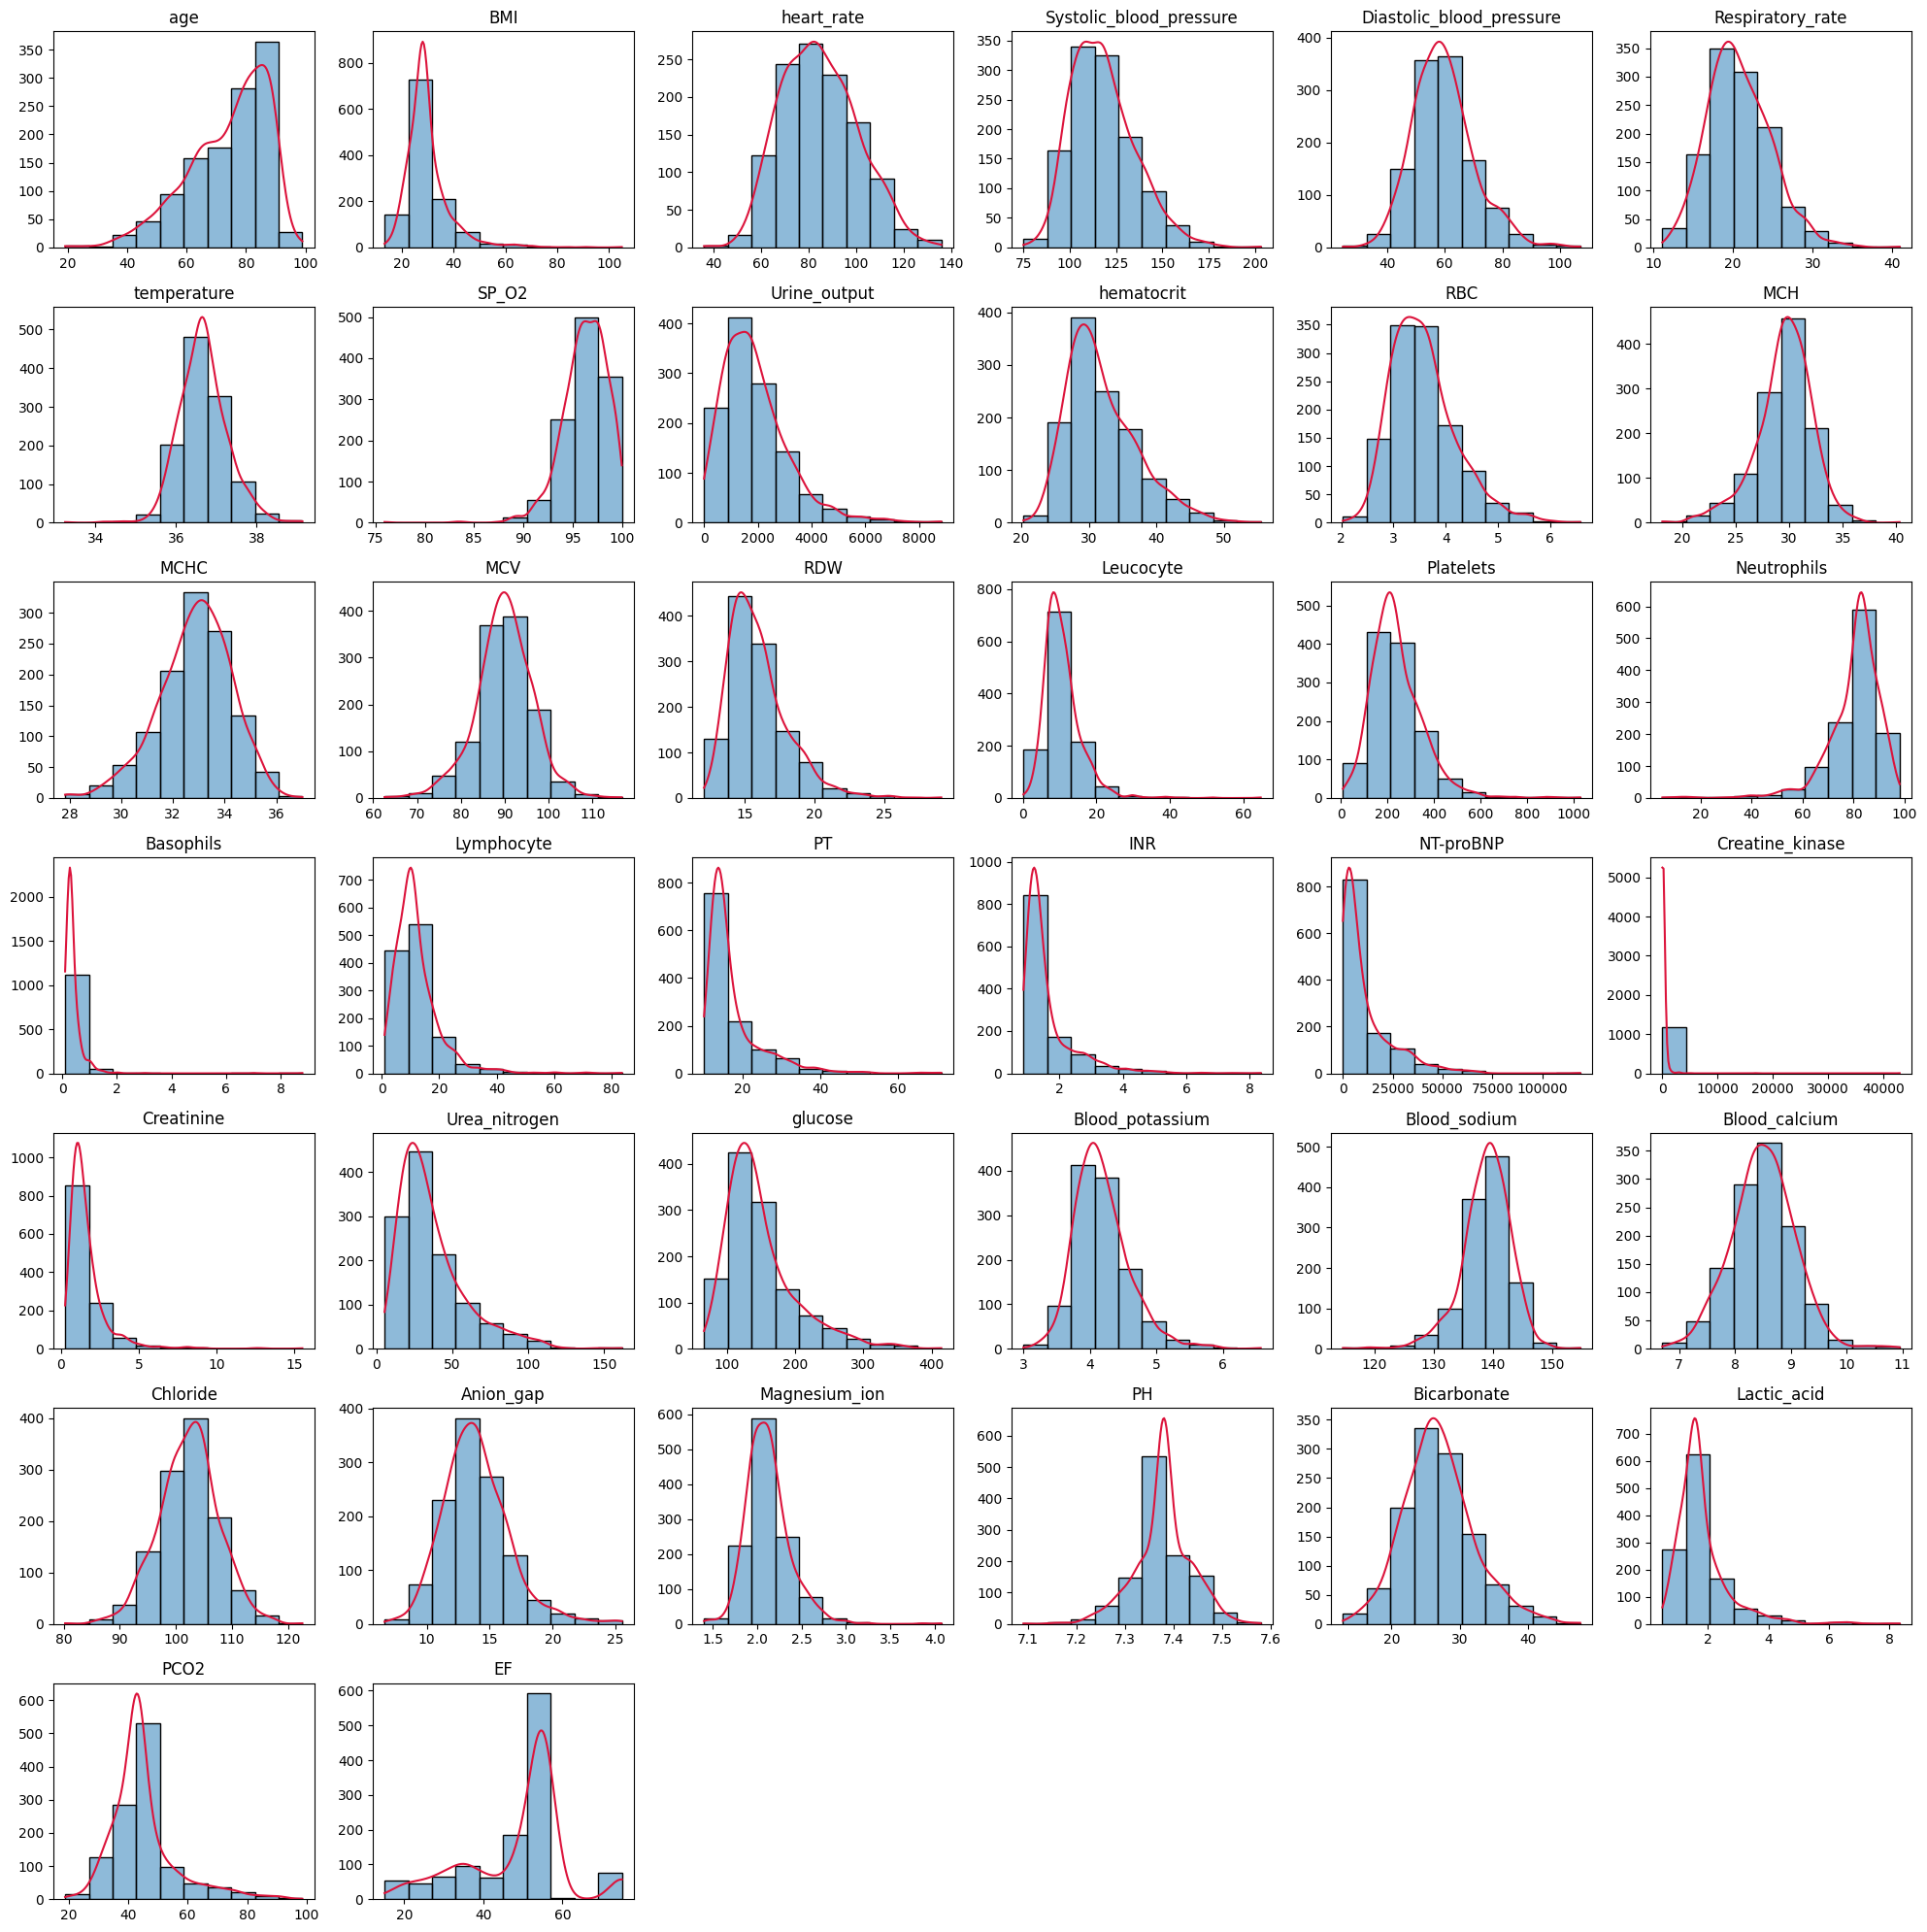

In [234]:
#set up subplot variables for ease of visualization
fig, ax = plt.subplots(7,6,figsize=(20,20))
ax = ax.ravel()
pos = 0
n = df.shape[0]

#plot Hisograms with kde 
for column in df.select_dtypes(exclude="category").columns:
    w = (df[column].max() - df[column].min())/np.sqrt(n)
    sns.histplot(data = df[column], ax=ax[pos], kde=True, bins=10).set_title(column)
    ax[pos].set(xlabel = None, ylabel=None)
    ax[pos].lines[0].set_color('crimson')
    pos+=1


#formatting subplot
plt.tight_layout()
#remove unused subplot axes
for i in range(38,42):
        plt.delaxes(ax[i])

In [235]:
#function for getting lower and upper bounds for outliers 
def bounds(column):
    q1,q3 = df[column].quantile([0.25,0.75])
    lb_fixed_acidity = q1 - (q3 - q1) * 1.5
    up_fixed_acidity = q3 + (q3 - q1) * 1.5
    return [lb_fixed_acidity,up_fixed_acidity]

#function for finding outliers for a dataframe column 
def outliers(column):
    b = bounds(column)
    outliers = df[(df[column]<b[0]) | (df[column]>b[1])][column]
    return outliers

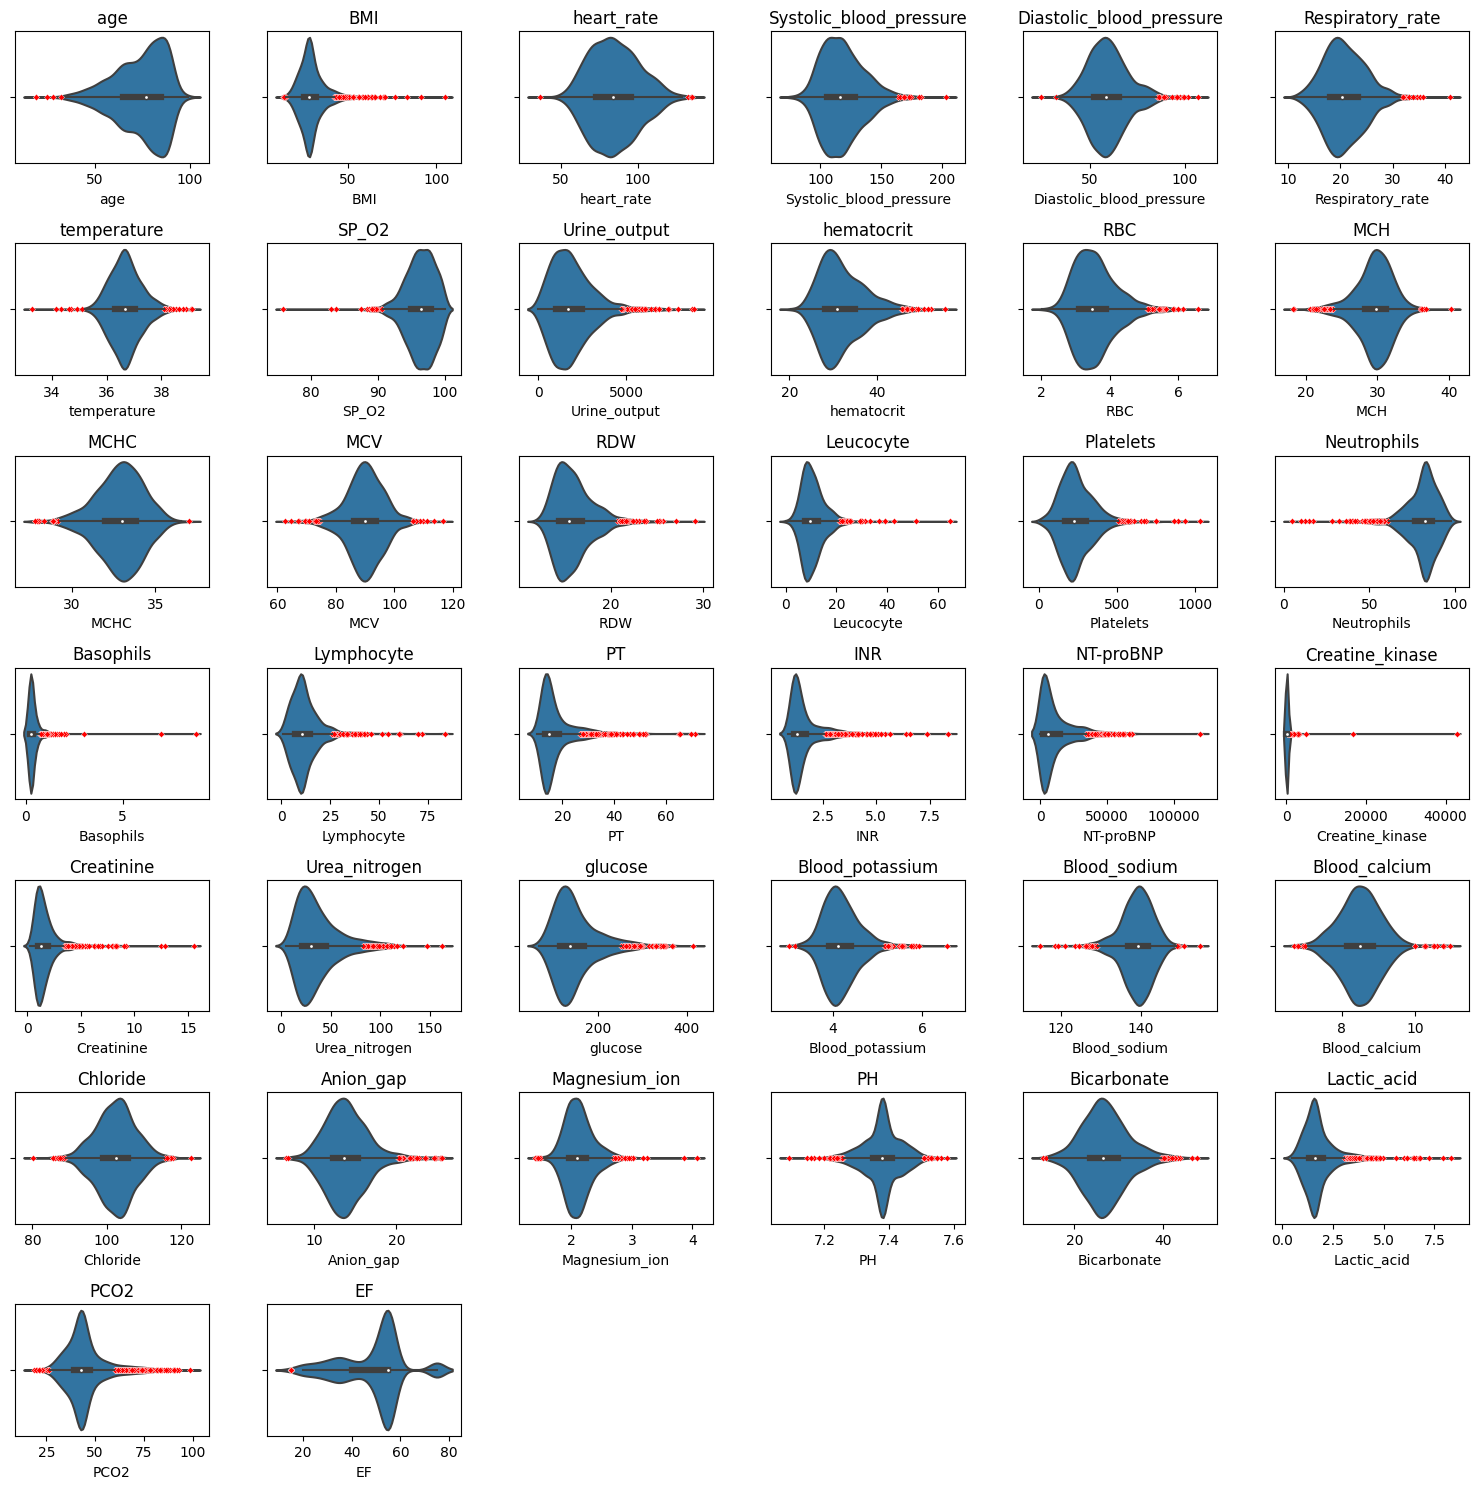

In [236]:
#set up subplot variables for ease of visualization
fig, ax = plt.subplots(7,6,figsize=(15,15))
ax = ax.ravel()
pos = 0
#plot violin plots with data points outside of the lower and upper bounds marked 
for column in df.columns:
    if (df[column].dtype != "category"):
        sns.violinplot(data = df, x = column, ax=ax[pos])
        sns.scatterplot(x=outliers(column),y=0,marker='D',color='red',ax=ax[pos],s=10)
        ax[pos].set_title(column)
        pos+=1

#formatting subplot
plt.tight_layout()
#remove unused subplot axes
for i in range(38,42):
        plt.delaxes(ax[i])

<AxesSubplot: >

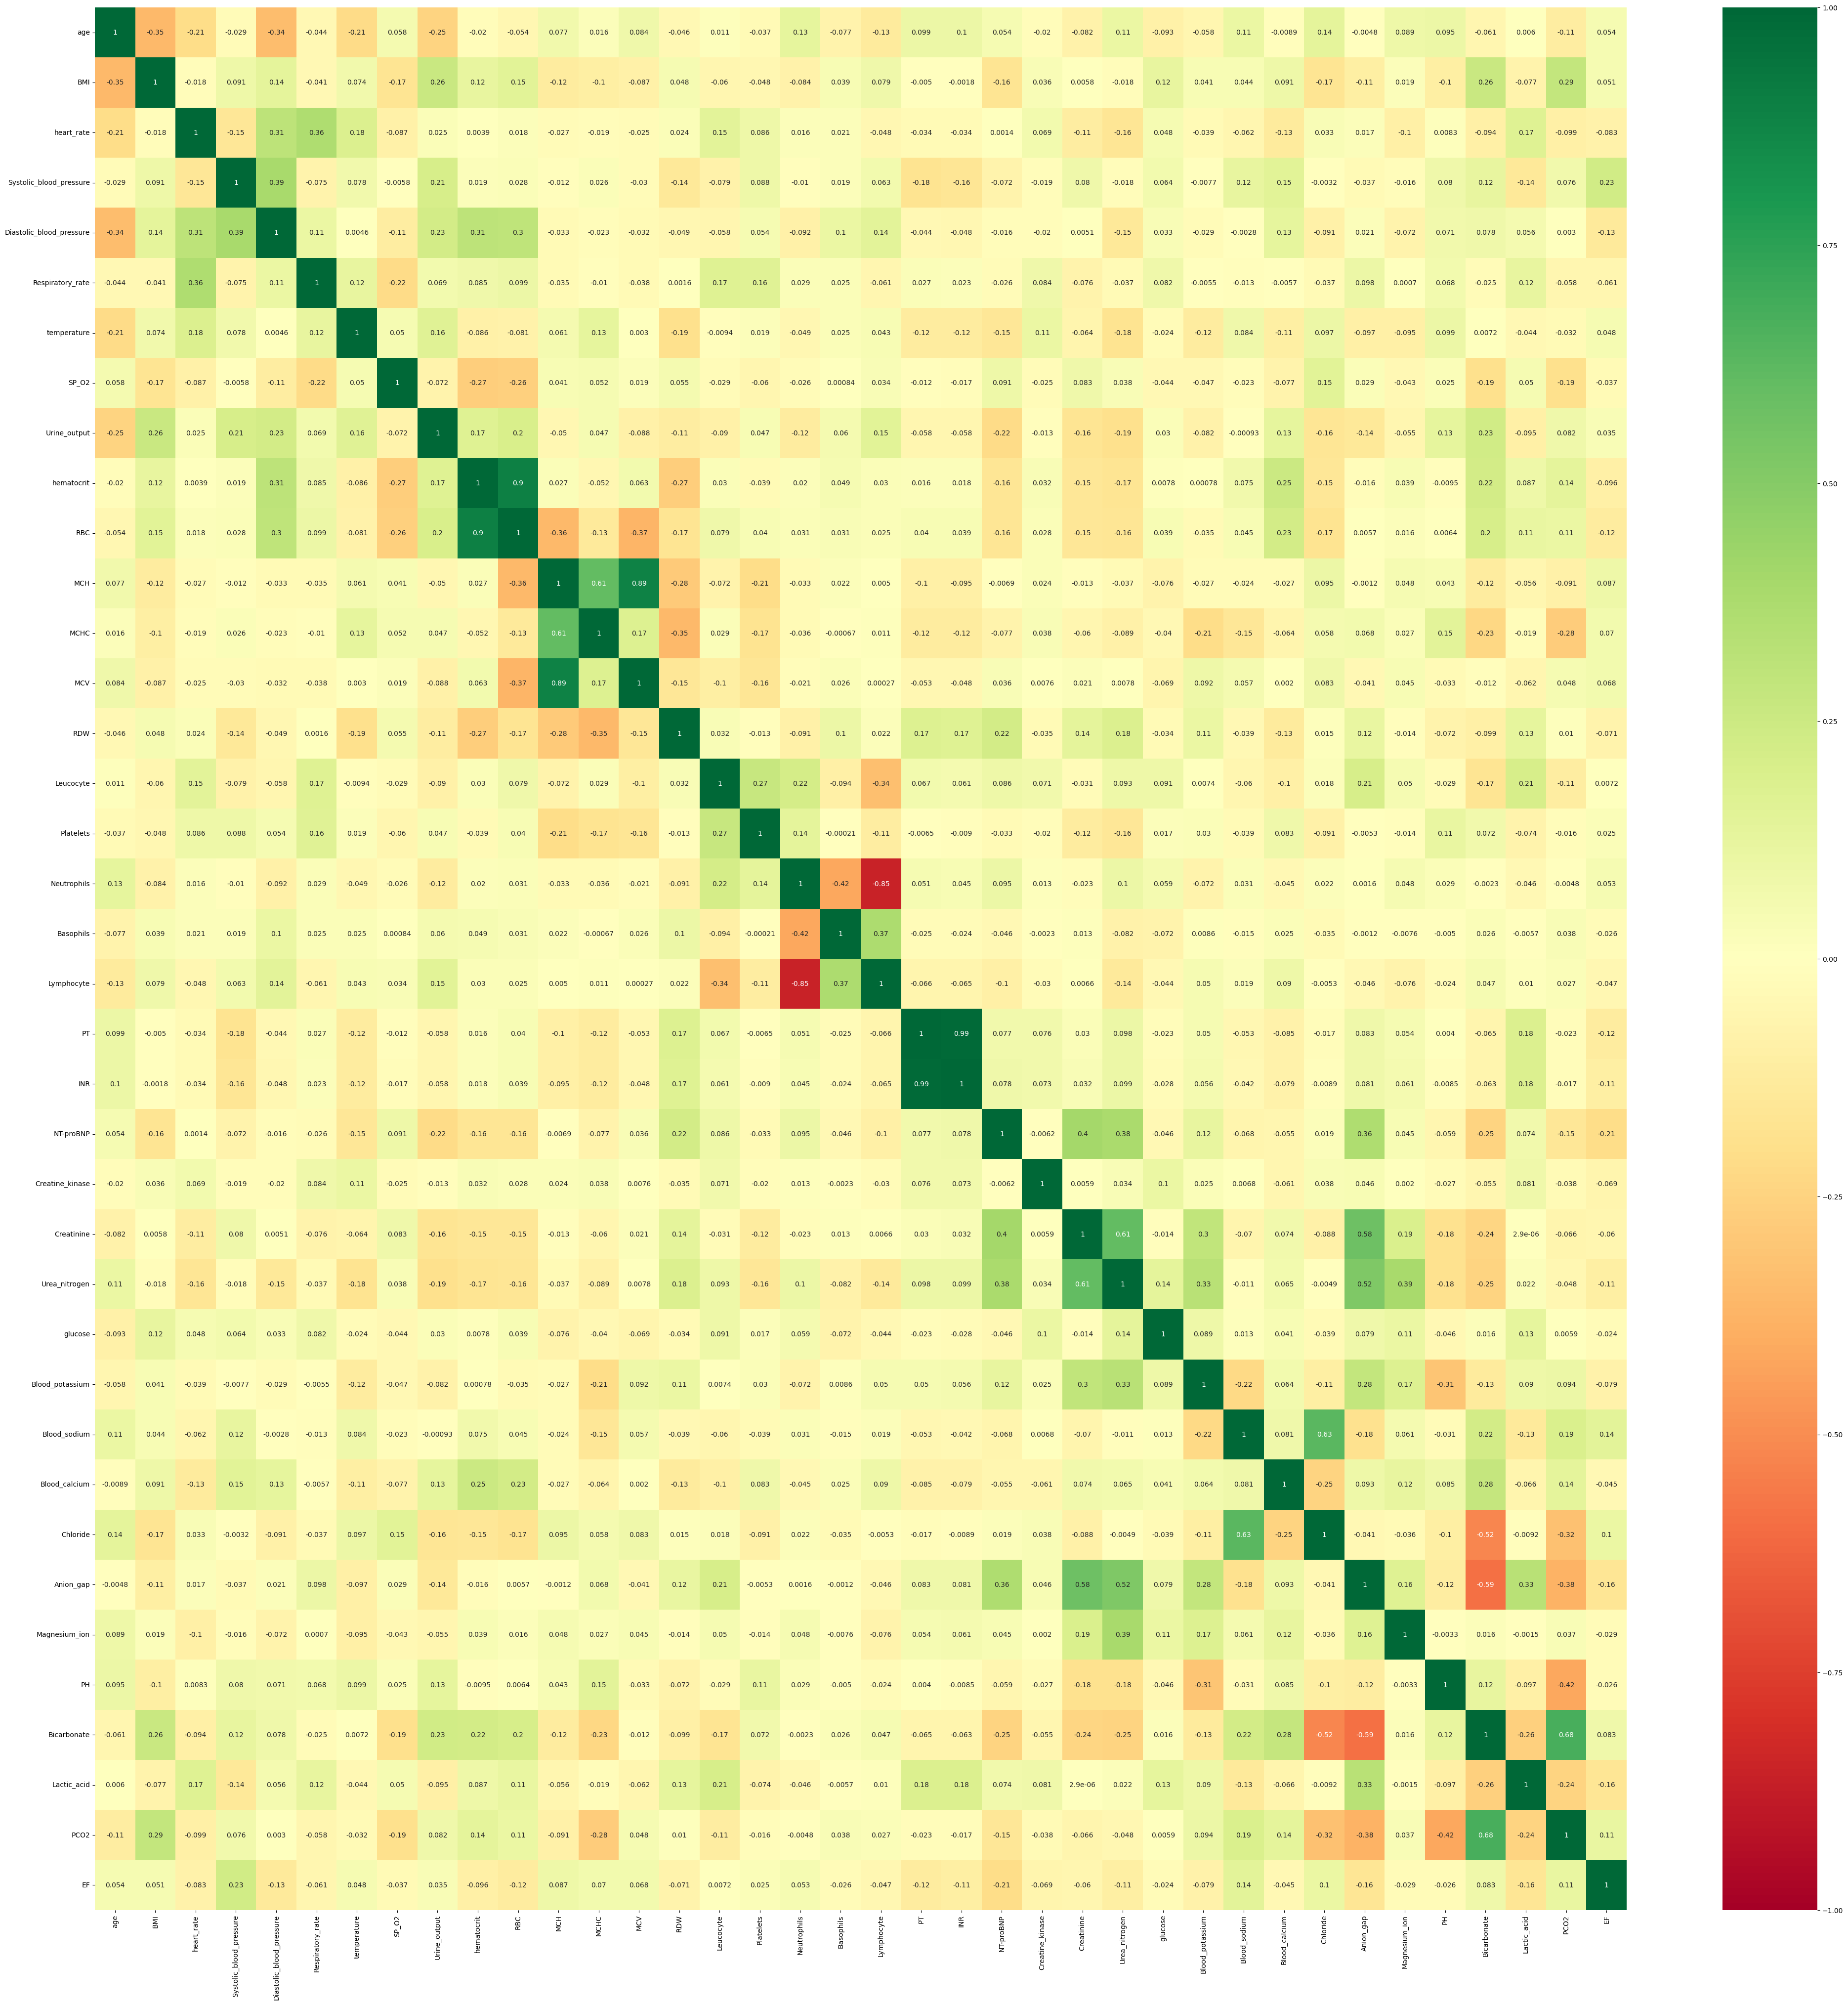

In [237]:
#correlation coefficient heatmap
plt.figure(figsize=(50,50))
sns.heatmap(df.select_dtypes(exclude="category").corr(),annot=True,cmap="RdYlGn",vmin=-1,vmax=1,center = 0)

In [238]:
#sns.pairplot(df.select_dtypes(exclude="category"))

In [239]:
df = df[df['age'] >35]
df = df[df['BMI'] < 50]
df = df[df['heart_rate'] < 130]
df = df[df['Systolic_blood_pressure'] < 170]
df = df[df['Diastolic_blood_pressure'] < 95]
df = df[df['Diastolic_blood_pressure'] > 30]
df = df[df['Respiratory_rate'] < 33]
df = df[df['temperature'] < 38.5]
df = df[df['temperature'] > 34.5]
df = df[df['SP_O2'] > 88]
df = df[df['Urine_output'] < 6000]
df = df[df['hematocrit'] < 50]
df = df[df['RBC'] < 5.8]
df = df[df['MCH'] > 20]
df = df[df['MCH'] < 40]
df = df[df['MCHC'] >28]
df = df[df['MCHC'] <37]
df = df[df['MCV'] > 68]
df = df[df['MCV'] < 111]
df = df[df['RDW'] < 25]
df = df[df['Leucocyte'] < 30]
df = df[df['Platelets'] < 800]
df = df[df['Neutrophils'] > 30]
df = df[df['Basophils'] < 2]
df = df[df['Lymphocyte'] < 50]
df = df[df['PT'] < 60]
df = df[df['INR'] < 6]
df = df[df['NT-proBNP'] < 70000]
df = df[df['Creatine_kinase'] < 6000]
df = df[df['Creatinine'] < 9]
df = df[df['Urea_nitrogen'] < 112]
df = df[df['glucose'] < 360]
df = df[df['Blood_potassium'] < 6]
df = df[df['Blood_sodium'] >125]
df = df[df['Blood_sodium'] <150]
df = df[df['Chloride'] <120]
df = df[df['Chloride'] >81]
df = df[df['Anion_gap'] < 23]
df = df[df['Anion_gap'] > 7.5]
df = df[df['Magnesium_ion'] < 3.5]
df = df[df['PH'] > 7.1]
df = df[df['Bicarbonate'] < 45]
df = df[df['Lactic_acid'] < 5.5]
df = df[df['PCO2'] < 95]

In [240]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1015 entries, 0 to 1176
Data columns (total 49 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   outcome                   1015 non-null   category
 1   age                       1015 non-null   int64   
 2   gendera                   1015 non-null   category
 3   BMI                       1015 non-null   float64 
 4   hypertensive              1015 non-null   category
 5   atrialfibrillation        1015 non-null   category
 6   CHD_with_no_MI            1015 non-null   category
 7   diabetes                  1015 non-null   category
 8   deficiencyanemias         1015 non-null   category
 9   depression                1015 non-null   category
 10  Hyperlipemia              1015 non-null   category
 11  Renal_failure             1015 non-null   category
 12  COPD                      1015 non-null   category
 13  heart_rate                1015 non-null   float6

<AxesSubplot: >

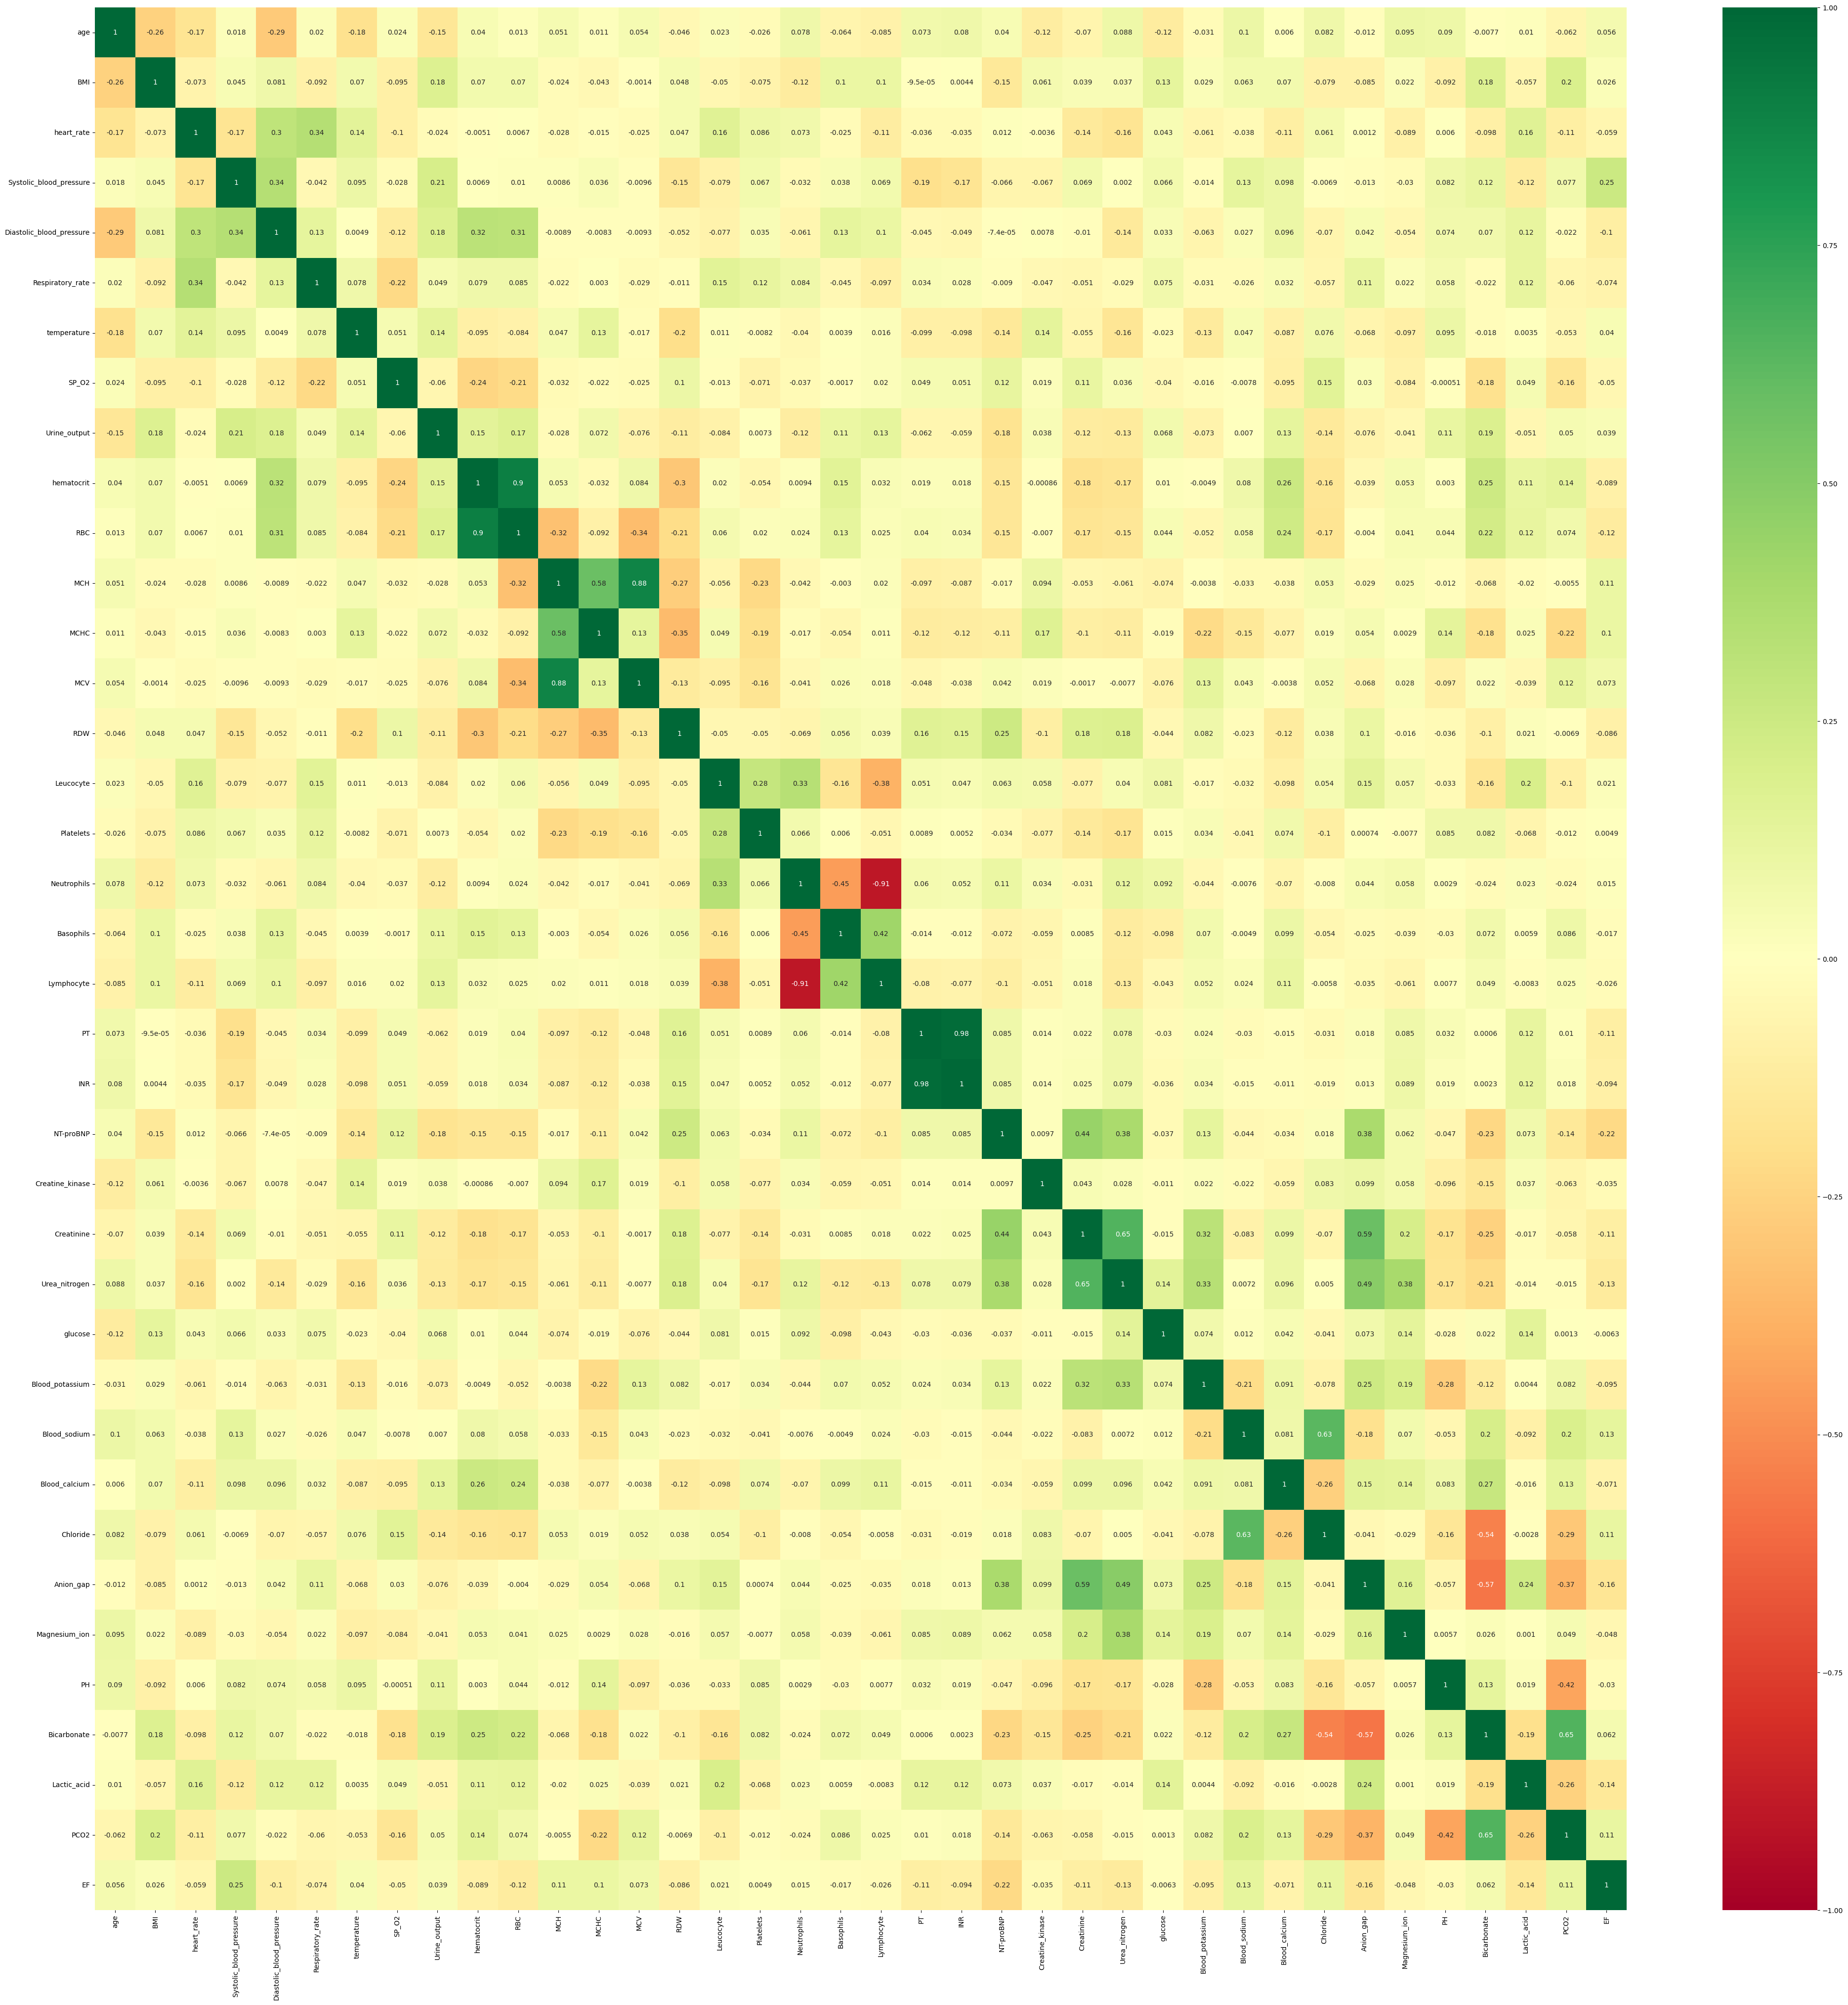

In [241]:
plt.figure(figsize=(50,50))
sns.heatmap(df.select_dtypes(exclude="category").corr(),annot=True,cmap="RdYlGn",vmin=-1,vmax=1,center = 0)

In [242]:
#sns.pairplot(df.select_dtypes(exclude="category"))

### Feature Selection

In [273]:
# #Feature Selection using Lasso
x=df.loc[:, df.columns != 'outcome']
y = df['outcome']


#StandardScaler
sc=StandardScaler()
sc.fit(x)
x=sc.transform(x)


#Train test split in 80:20 ratio
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)



lasso_model = linear_model.Lasso(alpha=0.01,
                               positive=True,
                               fit_intercept=False, 
                               max_iter=1000,
                               tol=0.0001)
lasso_model.fit(x_train, y_train)

# coeff  = regressor.coef_
# df_coeff = pd.DataFrame({'Features':df.columns[1:], 'scores': coeff})
# df_coeff.sort_values(by='scores',ascending=False)

print("Feature Selection using Lasso")
eli5.show_weights(lasso_model, top=-1, feature_names = df.columns[1:].tolist())

Feature Selection using Lasso


Weight?,Feature
+0.028,atrialfibrillation
+0.020,NT-proBNP
+0.018,Lactic_acid
+0.003,Creatine_kinase


In [244]:
#Checking for multicollinearity 
#vif higher than 10 is usually considered to have high correlation with other independent variables 

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['features'] = df.columns
vif['vif_factor'] = [variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
vif = vif.sort_values(by='vif_factor')
df.drop(list(vif[vif['vif_factor']>10]['features']),inplace=True,axis=1)
vif

,features,vif_factor
6,CHD_with_no_MI,1.199983
9,depression,1.248223
12,COPD,1.265384
0,outcome,1.423661
34,Creatine_kinase,1.462645
10,Hyperlipemia,1.862689
8,deficiencyanemias,1.937351
5,atrialfibrillation,2.407948
7,diabetes,2.487485
11,Renal_failure,2.601700


In [245]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1015 entries, 0 to 1176
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   outcome             1015 non-null   category
 1   hypertensive        1015 non-null   category
 2   atrialfibrillation  1015 non-null   category
 3   CHD_with_no_MI      1015 non-null   category
 4   diabetes            1015 non-null   category
 5   deficiencyanemias   1015 non-null   category
 6   depression          1015 non-null   category
 7   Hyperlipemia        1015 non-null   category
 8   Renal_failure       1015 non-null   category
 9   COPD                1015 non-null   category
 10  Urine_output        1015 non-null   float64 
 11  Platelets           1015 non-null   float64 
 12  Basophils           1015 non-null   float64 
 13  NT-proBNP           1015 non-null   float64 
 14  Creatine_kinase     1015 non-null   float64 
 15  Creatinine          1015 non-null   fl

r^2 on test data: 0.008491 


C:\Users\15513\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(


<AxesSubplot: title={'center': 'Modal Coefficient'}>

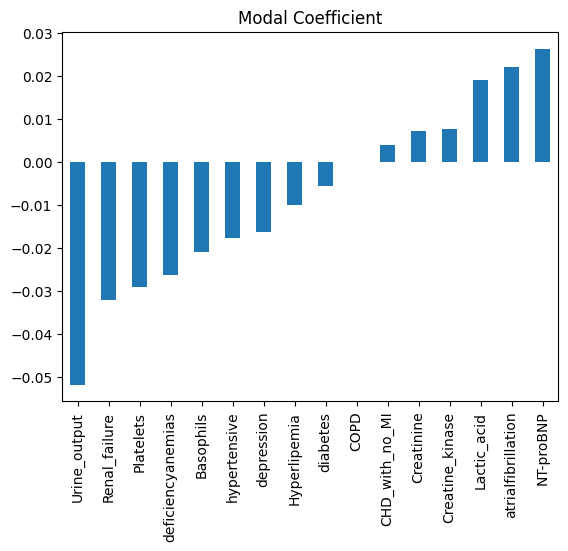

In [246]:
#feature selection using Ridge

x=df.loc[:, df.columns != 'outcome'].values #independent features
y = df['outcome'].values #dependent features


validation_size=0.20 #split size: 80:20
seed=42 

#StandardScaler
sc=StandardScaler()
sc.fit(x)
x=sc.transform(x)

#Train test split in 80:20 ratio
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=validation_size,random_state=seed)


alpha=1.0 #0.1 learning rate
ridge =Ridge(alpha=alpha,normalize=False)


y_pred_ridge = ridge.fit(x_train,y_train).predict(x_test)
r2_score_ridge=r2_score(y_test,y_pred_ridge)

print("r^2 on test data: %f " % r2_score_ridge)
predictors=df.columns.values[1:]


coef=pd.Series(ridge.coef_,predictors).sort_values()
coef.plot(kind='bar',title='Modal Coefficient')

In [247]:
# Feature selection using SelectKBest algorithm

x=df.loc[:, df.columns != 'outcome'].values
y = df['outcome'].values
z=df.iloc[:,0:df.shape[1]-1]



selector=SelectKBest(f_classif,k='all')

X_new=selector.fit_transform(x,y)
names=z.columns.values[selector.get_support()]

 
scores=selector.scores_[selector.get_support()]

#combining the columns name and scores
name_scores=list(zip(names,scores))

#creating a dataframe
ns_df=pd.DataFrame(data=name_scores,columns=['Feat_names','F_scores'])

#sort the dataframe for better visualization
ns_df_sorted=ns_df.sort_values(['F_scores','Feat_names'],ascending=[False,True])
print(ns_df_sorted)


            Feat_names   F_scores
9                 COPD  28.245413
15          Creatinine  12.439569
1         hypertensive   9.455356
11           Platelets   8.732008
4             diabetes   8.652405
7         Hyperlipemia   8.518046
10        Urine_output   7.490094
12           Basophils   7.022822
0              outcome   5.171446
3       CHD_with_no_MI   3.459970
5    deficiencyanemias   3.367853
6           depression   2.692455
14     Creatine_kinase   2.097315
13           NT-proBNP   0.893067
8        Renal_failure   0.557430
2   atrialfibrillation   0.039756


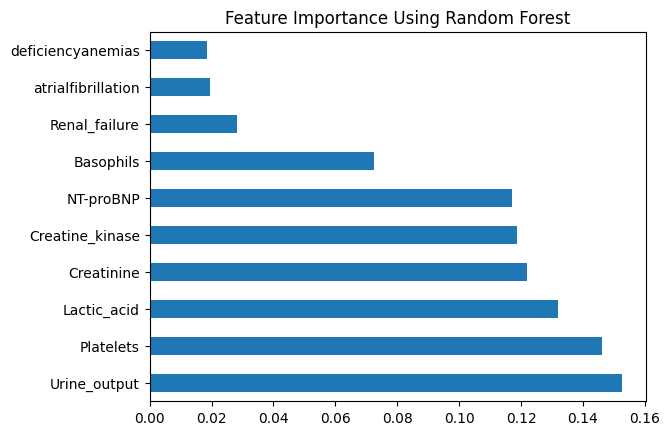

In [248]:
#Feature selection using Random Forest

x=df.loc[:, df.columns != 'outcome']
y = df['outcome']

model = RandomForestClassifier()
model.fit(x,y)

# print(model.feature_importances_) #use inbuilt class feature_importances of random based classifiers

#plotting graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.title("Feature Importance Using Random Forest")
plt.show()


In [272]:
#Feature Selection using Lasso
x=df.loc[:, df.columns != 'outcome']
y = df['outcome']


#StandardScaler
sc=StandardScaler()
sc.fit(x)
x=sc.transform(x)


#Train test split in 80:20 ratio
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)



lasso_model = linear_model.Lasso(alpha=0.01,
                               positive=True,
                               fit_intercept=False, 
                               max_iter=1000,
                               tol=0.0001)
lasso_model.fit(x_train, y_train)

# coeff  = regressor.coef_
# df_coeff = pd.DataFrame({'Features':df.columns[1:], 'scores': coeff})
# df_coeff.sort_values(by='scores',ascending=False)

print("Feature Selection using Lasso")
eli5.show_weights(lasso_model, top=-1, feature_names = df.columns[1:].tolist())

Feature Selection using Lasso


Weight?,Feature
+0.028,atrialfibrillation
+0.020,NT-proBNP
+0.018,Lactic_acid
+0.003,Creatine_kinase


Index(['Urine_output', 'Platelets', 'Basophils', 'NT-proBNP',
       'Creatine_kinase', 'Creatinine', 'Lactic_acid'],
      dtype='object')


C:\Users\15513\AppData\Local\Temp\ipykernel_20264\2901310039.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = df.corr()


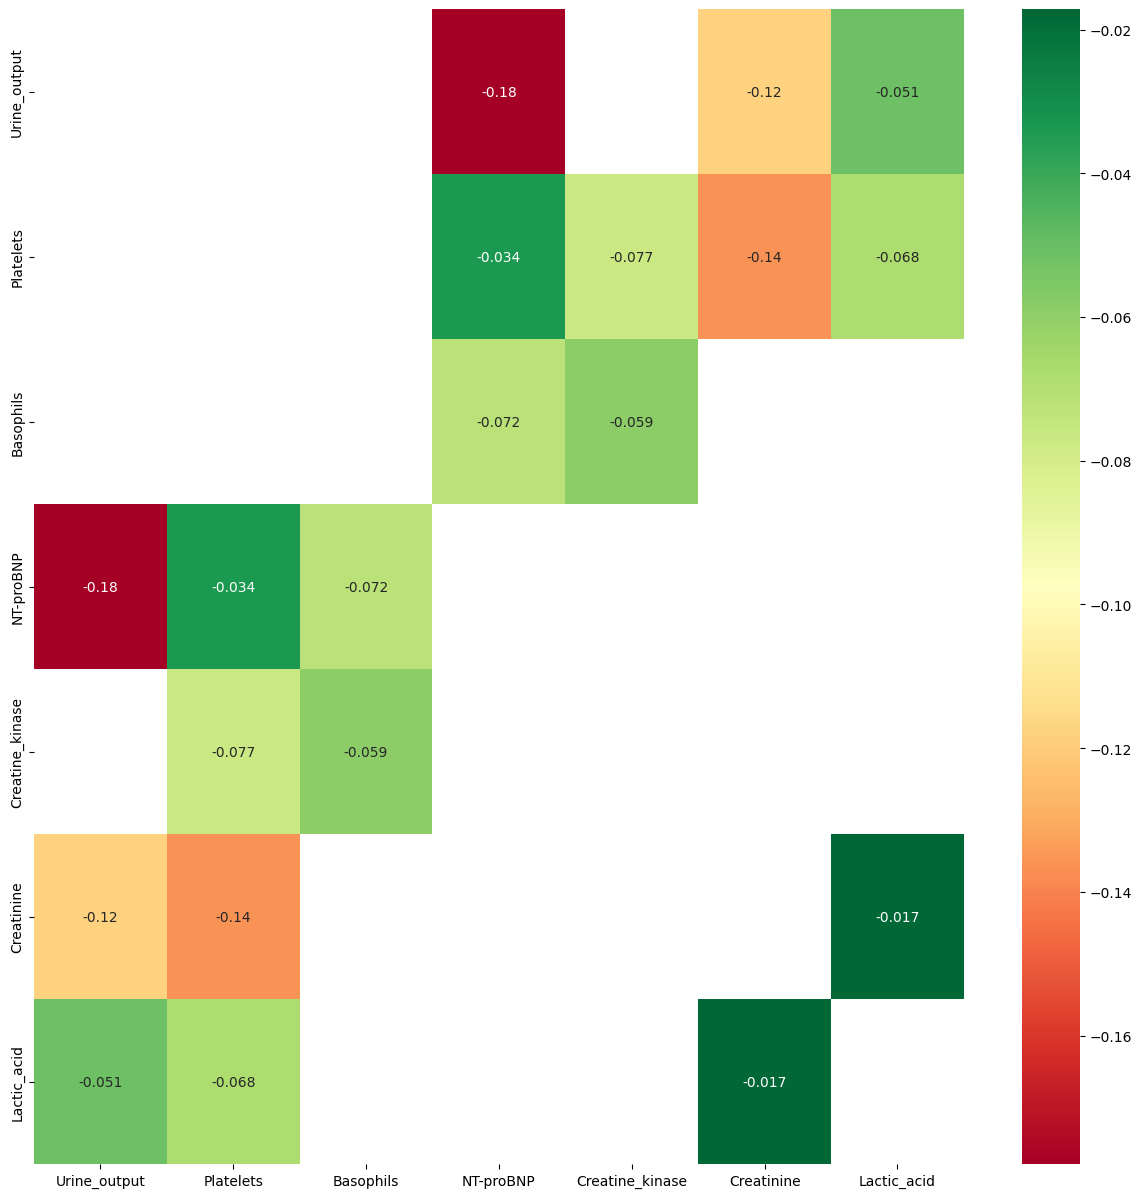

In [250]:
    

#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(15,15))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn" ,mask =  corrmat >0.0)
print(top_corr_features)

In [251]:
# Replace values in gender column with 0 and 1
#df['gendera'] = df['gendera'].apply(lambda x: '0' if x == 1 else '1')

### PCA

**Target Variable:** Outcome
* 0 - Alive
* 1 - Death

In [252]:
df_n = df.copy()

The first preprocessing step is to divide the dataset into a feature set and corresponding labels

In [253]:
X = df_n.drop(['outcome'], axis=1)
y = df_n['outcome']

In [254]:
# performing standard scalar normalization to normalize our feature set
sc = StandardScaler()
X_sc = sc.fit_transform(X)

In [255]:
# Applying pca
pca = PCA(0.95)
X_pca= pca.fit_transform(X_sc)

In [256]:
print(pca.explained_variance_ratio_)

[0.12783863 0.08530976 0.08117451 0.07395339 0.07099781 0.06616692
 0.0620688  0.05901428 0.05646857 0.05503229 0.05388258 0.05091439
 0.04768741 0.04659244 0.03672482]


In [257]:
print(pca.explained_variance_ratio_.sum())

0.973826596533065


Let's plot a Scree Plot which will  explained variance.

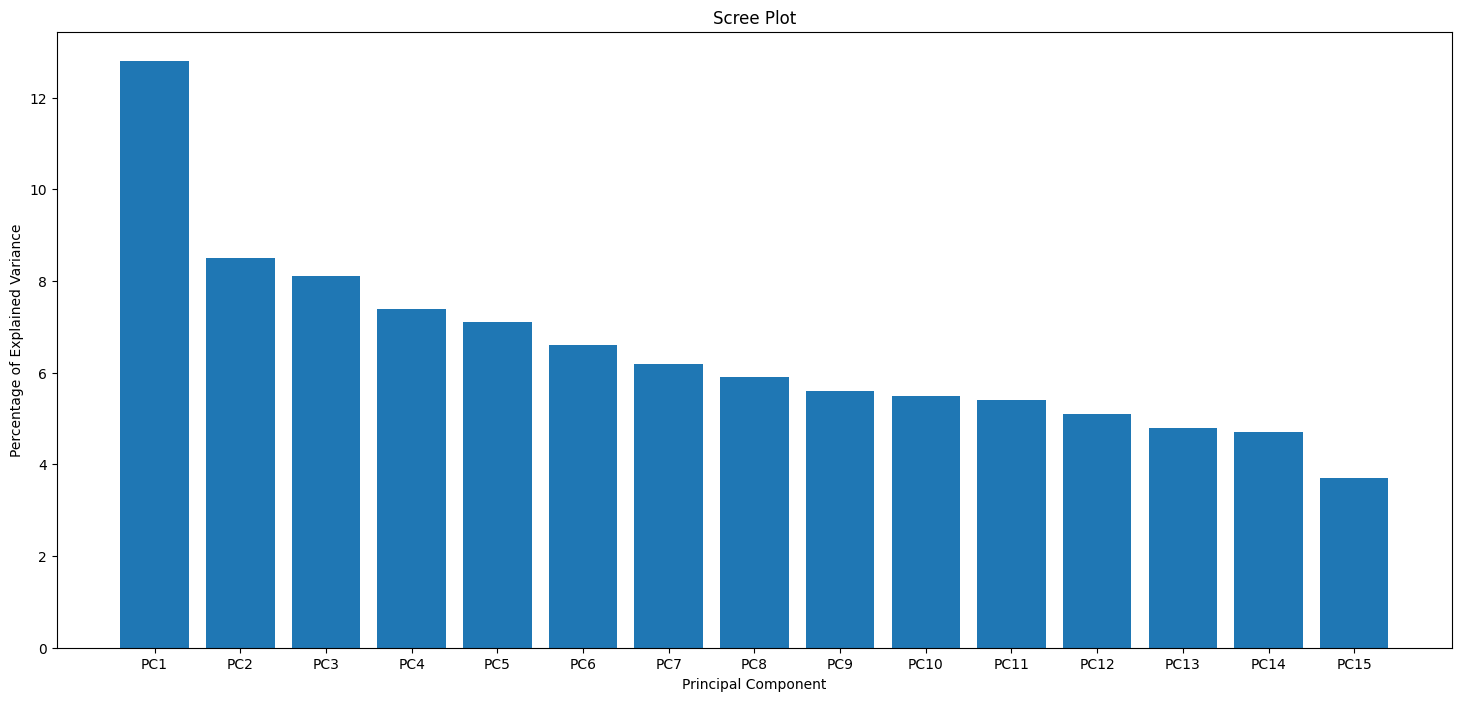

In [258]:
per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]
plt. figure(figsize=(18,8))
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

### Modeling

#### Logistic Regression

In [259]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [260]:
#pipeline for logistic regression

steps_logistic = [("standard_scaler",StandardScaler()),("logistic_regression",LogisticRegression())]
logistic_pipeline = Pipeline(steps_logistic)

In [261]:
#train test split 
X_train, X_test, y_train, y_test = train_test_split(df.drop('outcome',axis=1), 
                                                    df['outcome'], test_size=0.30, 
                                                    random_state=42)

In [262]:
#fit pipeline to training data 
logistic_pipeline.fit(X_train, y_train)

#logistic model predictions 
predictions = logistic_pipeline.predict(X_test)

In [263]:
print('Accuracy Score: ', accuracy_score(y_test, predictions))
print('Confusion Matrix: \n', confusion_matrix(y_test,predictions))
print('Classification Report: \n', classification_report(y_test,predictions))

Accuracy Score:  0.8852459016393442
Confusion Matrix: 
 [[268   6]
 [ 29   2]]
Classification Report: 
               precision    recall  f1-score   support

         0.0       0.90      0.98      0.94       274
         1.0       0.25      0.06      0.10        31

    accuracy                           0.89       305
   macro avg       0.58      0.52      0.52       305
weighted avg       0.84      0.89      0.85       305



#### Random Forest

In [264]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [265]:
#pipeline for random forest
steps_forest = [('random_forest', RandomForestClassifier())]
forest_pipeline = Pipeline(steps_forest)

#params for GridSearchCV
params = {'random_forest__n_estimators': [25,50,100,150,200,250,300],
         'random_forest__criterion': ['gini','entropy'],
         'random_forest__max_features':['sqrt','log2',None]}

#list(forest_pipeline.get_params().keys())

In [266]:
cv = GridSearchCV(forest_pipeline, param_grid = params)
cv.fit(X_train, y_train)
predictions_forest = cv.predict(X_test)

In [267]:
#grid search best parameters and score 
cv.best_params_

{'random_forest__criterion': 'gini',
 'random_forest__max_features': 'sqrt',
 'random_forest__n_estimators': 200}

In [268]:
#grid search best score
cv.best_score_

0.8816901408450704

In [269]:
#define best grid 
best_grid = cv.best_estimator_
best_grid

Pipeline(steps=[('random_forest', RandomForestClassifier(n_estimators=200))])

In [270]:
#Random Forest with best parameters 
ranforest2 = RandomForestClassifier(n_estimators=50, criterion = 'entropy', max_features=None)
ranforest2.fit(X_train, y_train)
ranforest_pred2 = ranforest2.predict(X_test)

In [271]:
print('Accuracy Score: ', accuracy_score(y_test, ranforest_pred2))
print('Confusion Matrix: \n', confusion_matrix(y_test, ranforest_pred2))
print('Classification Report:\n ', classification_report(y_test, ranforest_pred2))

Accuracy Score:  0.8950819672131147
Confusion Matrix: 
 [[269   5]
 [ 27   4]]
Classification Report:
                precision    recall  f1-score   support

         0.0       0.91      0.98      0.94       274
         1.0       0.44      0.13      0.20        31

    accuracy                           0.90       305
   macro avg       0.68      0.56      0.57       305
weighted avg       0.86      0.90      0.87       305

